In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Load the dataset
df = pd.read_csv('../data/train_test_network.csv')

print("="*80)
print("NETWORK SECURITY DATASET EXPLORATION")
print("="*80)

NETWORK SECURITY DATASET EXPLORATION


In [3]:
# Basic Dataset Information
print("\n1. BASIC DATASET INFORMATION")
print("-" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


1. BASIC DATASET INFORMATION
--------------------------------------------------
Dataset shape: (211043, 44)
Number of rows: 211,043
Number of columns: 44
Memory usage: 350.24 MB

Column names:
 1. src_ip
 2. src_port
 3. dst_ip
 4. dst_port
 5. proto
 6. service
 7. duration
 8. src_bytes
 9. dst_bytes
10. conn_state
11. missed_bytes
12. src_pkts
13. src_ip_bytes
14. dst_pkts
15. dst_ip_bytes
16. dns_query
17. dns_qclass
18. dns_qtype
19. dns_rcode
20. dns_AA
21. dns_RD
22. dns_RA
23. dns_rejected
24. ssl_version
25. ssl_cipher
26. ssl_resumed
27. ssl_established
28. ssl_subject
29. ssl_issuer
30. http_trans_depth
31. http_method
32. http_uri
33. http_version
34. http_request_body_len
35. http_response_body_len
36. http_status_code
37. http_user_agent
38. http_orig_mime_types
39. http_resp_mime_types
40. weird_name
41. weird_addl
42. weird_notice
43. label
44. type


In [4]:
# Data Types and Missing Values
print("\n2. DATA TYPES AND MISSING VALUES")
print("-" * 50)
print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


2. DATA TYPES AND MISSING VALUES
--------------------------------------------------

Data types:
src_ip                     object
src_port                    int64
dst_ip                     object
dst_port                    int64
proto                      object
service                    object
duration                  float64
src_bytes                   int64
dst_bytes                   int64
conn_state                 object
missed_bytes                int64
src_pkts                    int64
src_ip_bytes                int64
dst_pkts                    int64
dst_ip_bytes                int64
dns_query                  object
dns_qclass                  int64
dns_qtype                   int64
dns_rcode                   int64
dns_AA                     object
dns_RD                     object
dns_RA                     object
dns_rejected               object
ssl_version                object
ssl_cipher                 object
ssl_resumed                object
ssl_established   

In [5]:
# First and Last few rows
print("\n3. SAMPLE DATA")
print("-" * 50)
print("\nFirst 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())


3. SAMPLE DATA
--------------------------------------------------

First 5 rows:
          src_ip  src_port         dst_ip  dst_port proto service    duration  \
0   192.168.1.37      4444  192.168.1.193     49178   tcp       -  290.371539   
1  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000102   
2  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000148   
3  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000113   
4  192.168.1.193     49180   192.168.1.37      8080   tcp       -    0.000130   

   src_bytes  dst_bytes conn_state  missed_bytes  src_pkts  src_ip_bytes  \
0     101568       2592        OTH             0       108        108064   
1          0          0        REJ             0         1            52   
2          0          0        REJ             0         1            52   
3          0          0        REJ             0         1            48   
4          0          0        REJ             0   

In [6]:
# Target Variable Analysis
print("\n4. TARGET VARIABLE ANALYSIS")
print("-" * 50)

# Check label column
if 'label' in df.columns:
    print("\nLabel distribution:")
    label_counts = df['label'].value_counts()
    print(label_counts)
    
    print("\nLabel percentages:")
    label_percentages = df['label'].value_counts(normalize=True) * 100
    for label, pct in label_percentages.items():
        print(f"{label}: {pct:.2f}%")

# Check type column
if 'type' in df.columns:
    print("\nType distribution:")
    type_counts = df['type'].value_counts()
    print(type_counts)
    
    print("\nType percentages:")
    type_percentages = df['type'].value_counts(normalize=True) * 100
    for type_val, pct in type_percentages.items():
        print(f"{type_val}: {pct:.2f}%")


4. TARGET VARIABLE ANALYSIS
--------------------------------------------------

Label distribution:
label
1    161043
0     50000
Name: count, dtype: int64

Label percentages:
1: 76.31%
0: 23.69%

Type distribution:
type
normal        50000
backdoor      20000
ddos          20000
dos           20000
injection     20000
password      20000
ransomware    20000
scanning      20000
xss           20000
mitm           1043
Name: count, dtype: int64

Type percentages:
normal: 23.69%
backdoor: 9.48%
ddos: 9.48%
dos: 9.48%
injection: 9.48%
password: 9.48%
ransomware: 9.48%
scanning: 9.48%
xss: 9.48%
mitm: 0.49%


In [7]:
# Network Protocol Analysis
print("\n5. NETWORK PROTOCOL ANALYSIS")
print("-" * 50)

print("\nProtocol distribution:")
proto_counts = df['proto'].value_counts()
print(proto_counts)

print("\nConnection state distribution:")
conn_state_counts = df['conn_state'].value_counts()
print(conn_state_counts)

print("\nService distribution (top 10):")
service_counts = df['service'].value_counts().head(10)
print(service_counts)


5. NETWORK PROTOCOL ANALYSIS
--------------------------------------------------

Protocol distribution:
proto
tcp     168747
udp      42015
icmp       281
Name: count, dtype: int64

Connection state distribution:
conn_state
S0        51937
SF        50210
REJ       44852
OTH       23332
SH        12014
S1        10771
S3         6557
SHR        5629
RSTR       1989
RSTRH      1690
RSTO       1309
S2          627
RSTOS0      126
Name: count, dtype: int64

Service distribution (top 10):
service
-             132032
dns            39446
http           37029
ftp             1065
ssl             1025
gssapi           184
dce_rpc          136
smb              108
smb;gssapi        18
Name: count, dtype: int64


In [10]:
# IP Address Analysis
print("\n6. IP ADDRESS ANALYSIS")
print("-" * 50)

print("\nTop 10 source IPs:")
src_ip_counts = df['src_ip'].value_counts().head(10)
print(src_ip_counts)

print("\nTop 10 destination IPs:")
dst_ip_counts = df['dst_ip'].value_counts().head(10)
print(dst_ip_counts)

print("\nUnique source IPs:", df['src_ip'].nunique())
print("Unique destination IPs:", df['dst_ip'].nunique())


6. IP ADDRESS ANALYSIS
--------------------------------------------------

Top 10 source IPs:
src_ip
192.168.1.30     61633
192.168.1.31     30355
192.168.1.32     27227
192.168.1.193    25000
192.168.1.152    21893
192.168.1.33      9439
192.168.1.37      7500
192.168.1.195     4208
192.168.1.180     3708
192.168.1.190     3179
Name: count, dtype: int64

Top 10 destination IPs:
dst_ip
192.168.1.190    47795
192.168.1.193    23790
192.168.1.152    22701
192.168.1.195    13524
192.168.1.184    12528
192.168.1.33     12041
192.168.1.37     11020
192.168.1.1      10623
176.28.50.165     9315
192.168.1.49      5595
Name: count, dtype: int64

Unique source IPs: 51
Unique destination IPs: 753


In [11]:
# Port Analysis
print("\n7. PORT ANALYSIS")
print("-" * 50)

print("\nTop 10 source ports:")
src_port_counts = df['src_port'].value_counts().head(10)
print(src_port_counts)

print("\nTop 10 destination ports:")
dst_port_counts = df['dst_port'].value_counts().head(10)
print(dst_port_counts)

# Well-known ports analysis
well_known_dst_ports = df[df['dst_port'] <= 1024]['dst_port'].value_counts().head(10)
print("\nTop 10 well-known destination ports (1-1024):")
print(well_known_dst_ports)


7. PORT ANALYSIS
--------------------------------------------------

Top 10 source ports:
src_port
80       3643
5353     3505
1880     3449
34296    3362
4444     2152
8080     1641
62946    1398
53921    1069
62947     908
42908     879
Name: count, dtype: int64

Top 10 destination ports:
dst_port
80       70673
53       34589
445      13449
8080     10329
443       7587
21        5880
5353      3505
51782     3363
10502     3353
4444      2384
Name: count, dtype: int64

Top 10 well-known destination ports (1-1024):
dst_port
80     70673
53     34589
445    13449
443     7587
21      5880
135      554
25       409
22       393
79       298
16       290
Name: count, dtype: int64


In [12]:
# Traffic Volume Analysis
print("\n8. TRAFFIC VOLUME ANALYSIS")
print("-" * 50)

# Bytes analysis
numeric_cols = ['duration', 'src_bytes', 'dst_bytes', 'src_pkts', 'dst_pkts']
print("\nTraffic statistics:")
print(df[numeric_cols].describe())

print("\nZero traffic connections:")
zero_src_bytes = (df['src_bytes'] == 0).sum()
zero_dst_bytes = (df['dst_bytes'] == 0).sum()
print(f"Connections with 0 src_bytes: {zero_src_bytes}")
print(f"Connections with 0 dst_bytes: {zero_dst_bytes}")


8. TRAFFIC VOLUME ANALYSIS
--------------------------------------------------

Traffic statistics:
            duration     src_bytes     dst_bytes       src_pkts       dst_pkts
count  211043.000000  2.110430e+05  2.110430e+05  211043.000000  211043.000000
mean        7.700887  2.581136e+05  2.588046e+05       9.595220       3.846861
std       564.141946  1.709490e+07  1.802563e+07      91.778821     330.705796
min         0.000000  0.000000e+00  0.000000e+00       0.000000       0.000000
25%         0.000000  0.000000e+00  0.000000e+00       1.000000       0.000000
50%         0.000170  0.000000e+00  0.000000e+00       1.000000       1.000000
75%         0.054196  1.300000e+02  8.900000e+01       4.000000       2.000000
max     93516.929170  3.890855e+09  3.913853e+09   24623.000000  121942.000000

Zero traffic connections:
Connections with 0 src_bytes: 138156
Connections with 0 dst_bytes: 148893


In [13]:
# Security-related Features Analysis
print("\n9. SECURITY FEATURES ANALYSIS")
print("-" * 50)

# DNS analysis
dns_queries = df['dns_query'].notna().sum()
print(f"DNS queries present: {dns_queries}")

if dns_queries > 0:
    print("\nDNS query types:")
    print(df[df['dns_query'].notna()]['dns_qtype'].value_counts())

# SSL analysis
ssl_connections = df['ssl_version'].notna().sum()
print(f"\nSSL connections: {ssl_connections}")

if ssl_connections > 0:
    print("\nSSL versions:")
    print(df[df['ssl_version'].notna()]['ssl_version'].value_counts())

# HTTP analysis
http_connections = df['http_method'].notna().sum()
print(f"\nHTTP connections: {http_connections}")

if http_connections > 0:
    print("\nHTTP methods:")
    print(df[df['http_method'].notna()]['http_method'].value_counts())


9. SECURITY FEATURES ANALYSIS
--------------------------------------------------
DNS queries present: 211043

DNS query types:
dns_qtype
0      176275
1       20798
28       7926
12       3207
255      1757
43        575
2         277
32        177
48         30
33          9
6           6
16          6
Name: count, dtype: int64

SSL connections: 211043

SSL versions:
ssl_version
-         210642
TLSv12       240
TLSv13       159
TLSv10         2
Name: count, dtype: int64

HTTP connections: 211043

HTTP methods:
http_method
-       210756
GET        266
POST        17
HEAD         4
Name: count, dtype: int64


In [14]:
# Attack Type Analysis
print("\n10. ATTACK TYPE ANALYSIS")
print("-" * 50)

# Group by attack type and analyze patterns
if 'type' in df.columns:
    attack_analysis = df.groupby('type').agg({
        'duration': ['mean', 'std'],
        'src_bytes': ['mean', 'std'],
        'dst_bytes': ['mean', 'std'],
        'src_pkts': ['mean', 'std'],
        'dst_pkts': ['mean', 'std']
    }).round(2)
    
    print("\nAttack type characteristics:")
    print(attack_analysis)


10. ATTACK TYPE ANALYSIS
--------------------------------------------------

Attack type characteristics:
           duration            src_bytes                dst_bytes  \
               mean      std        mean          std        mean   
type                                                                
backdoor      37.02  1792.17      173.17      5841.47      794.41   
ddos          17.08    52.26  2383954.40  46168511.58  2498872.09   
dos            0.49     8.96       21.19       698.48     4613.17   
injection      1.45     9.73   194818.36  27512498.49   200242.08   
mitm          28.05    64.10    14528.93    220056.78     4657.85   
normal         3.99   237.38     2127.62    332653.20     9767.99   
password       0.71     7.96      127.49       678.06     1222.27   
ransomware     0.00     0.00        0.00         0.00        0.00   
scanning       0.31     5.89        4.05        55.41       27.53   
xss           12.76    34.72   138477.66  13786518.90      510.22


11. CREATING VISUALIZATIONS
--------------------------------------------------


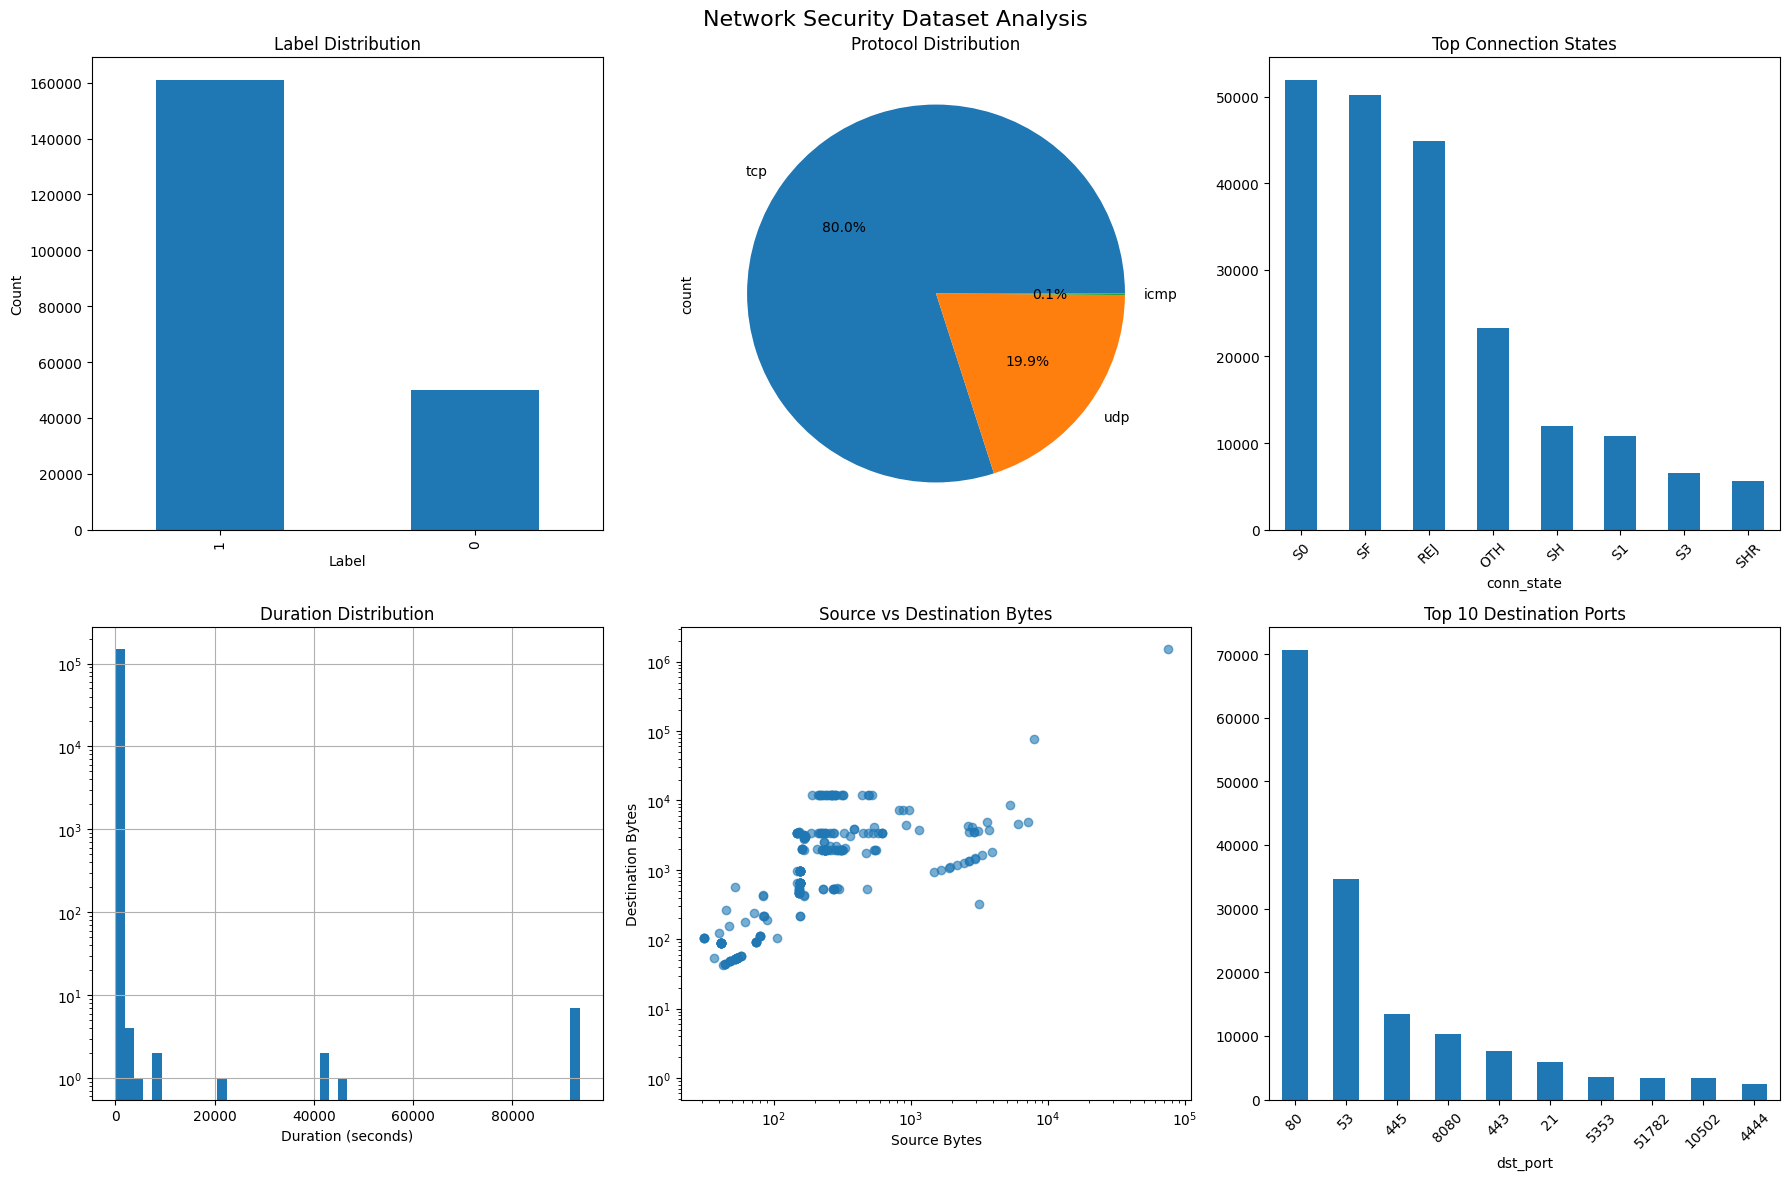

In [15]:
# Visualization
print("\n11. CREATING VISUALIZATIONS")
print("-" * 50)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Network Security Dataset Analysis', fontsize=16)

# 1. Label distribution
if 'label' in df.columns:
    df['label'].value_counts().plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Label Distribution')
    axes[0,0].set_xlabel('Label')
    axes[0,0].set_ylabel('Count')

# 2. Protocol distribution
df['proto'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Protocol Distribution')

# 3. Connection state distribution
df['conn_state'].value_counts().head(8).plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Top Connection States')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Duration distribution (log scale)
df[df['duration'] > 0]['duration'].hist(bins=50, ax=axes[1,0])
axes[1,0].set_title('Duration Distribution')
axes[1,0].set_xlabel('Duration (seconds)')
axes[1,0].set_yscale('log')

# 5. Bytes transferred scatter plot
sample_df = df.sample(n=min(1000, len(df)))
axes[1,1].scatter(sample_df['src_bytes'], sample_df['dst_bytes'], alpha=0.6)
axes[1,1].set_title('Source vs Destination Bytes')
axes[1,1].set_xlabel('Source Bytes')
axes[1,1].set_ylabel('Destination Bytes')
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')

# 6. Top ports
df['dst_port'].value_counts().head(10).plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Top 10 Destination Ports')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


12. CORRELATION ANALYSIS
--------------------------------------------------


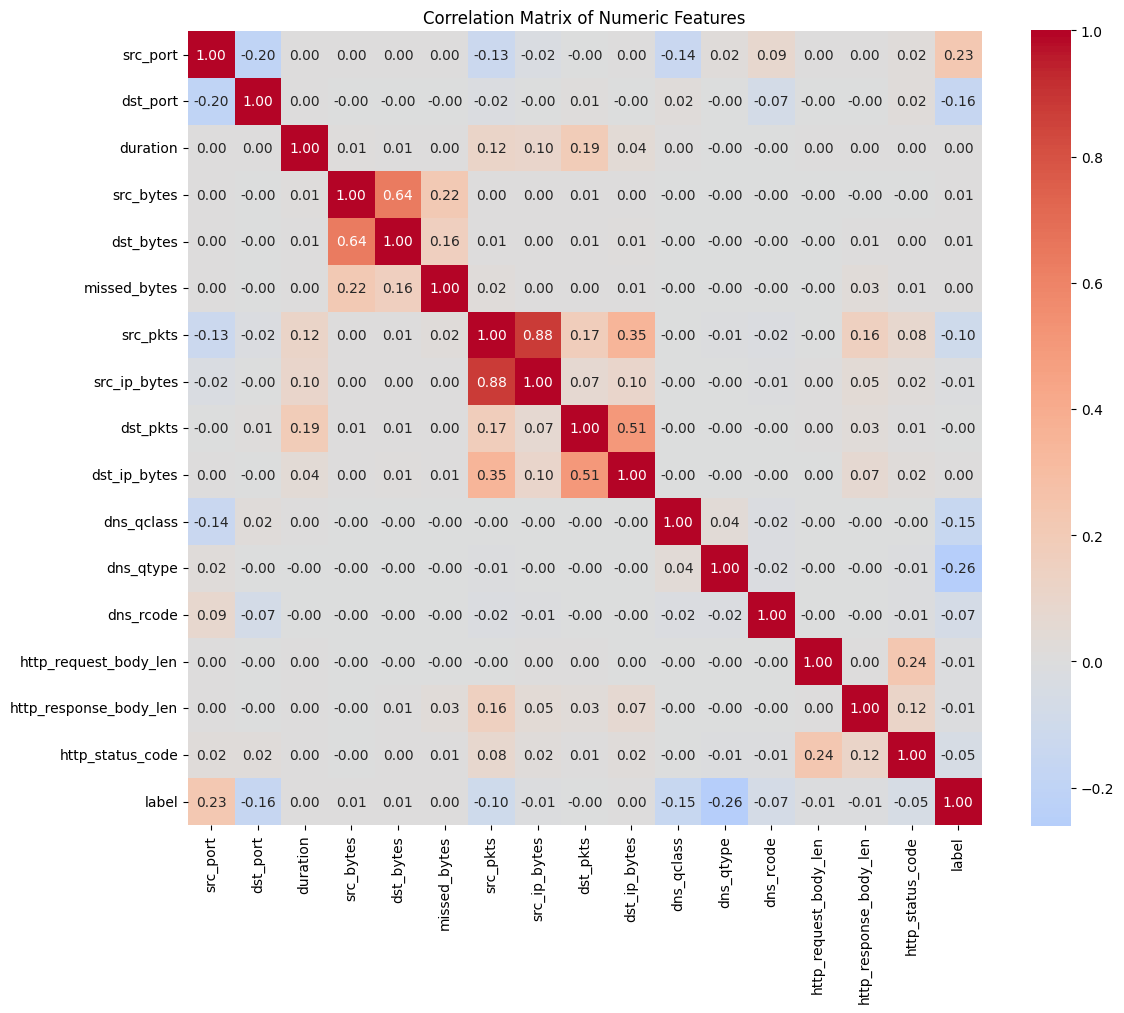


High correlations (>0.7 or <-0.7):
src_pkts - src_ip_bytes: 0.875
src_ip_bytes - src_pkts: 0.875


In [16]:
# Correlation Analysis
print("\n12. CORRELATION ANALYSIS")
print("-" * 50)

# Select numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Print high correlations
print("\nHigh correlations (>0.7 or <-0.7):")
high_corr = np.where(np.abs(correlation_matrix) > 0.7)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                   for x, y in zip(*high_corr) if x != y]
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

In [17]:
# Summary Report
print("\n13. SUMMARY REPORT")
print("=" * 50)
print(f"Dataset contains {df.shape[0]:,} network connections with {df.shape[1]} features")
print(f"Attack types present: {df['type'].unique() if 'type' in df.columns else 'N/A'}")
print(f"Protocols: {', '.join(df['proto'].unique())}")
print(f"Date range: Not available in current dataset")
print(f"Missing data: {df.isnull().sum().sum()} total missing values")
print("\nKey findings:")
print("- This appears to be a network intrusion detection dataset")
print("- Contains both normal and attack traffic")
print("- Includes various network protocols and connection states")
print("- Features cover network flow characteristics, DNS, SSL, and HTTP data")
print("=" * 50)


13. SUMMARY REPORT
Dataset contains 211,043 network connections with 44 features
Attack types present: ['backdoor' 'ddos' 'dos' 'injection' 'mitm' 'normal' 'password'
 'ransomware' 'scanning' 'xss']
Protocols: tcp, udp, icmp
Date range: Not available in current dataset
Missing data: 0 total missing values

Key findings:
- This appears to be a network intrusion detection dataset
- Contains both normal and attack traffic
- Includes various network protocols and connection states
- Features cover network flow characteristics, DNS, SSL, and HTTP data
